In [1]:
import pandas as pd
import numpy as np


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#    1     2   3    4   5 user_id

# 1  4.0

# 2  Nan

# 3  4.0

# 4 Nan
# movies_id

final_dataset = ratings.pivot(index="movieId", columns="userId", values="rating")

In [7]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
final_dataset.fillna(0, inplace=True)

In [9]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Removing noise from dataset

In [11]:
no_user_voted = ratings.groupby("movieId")['rating'].agg('count')
no_movies_voted = ratings.groupby("userId")['rating'].agg('count')

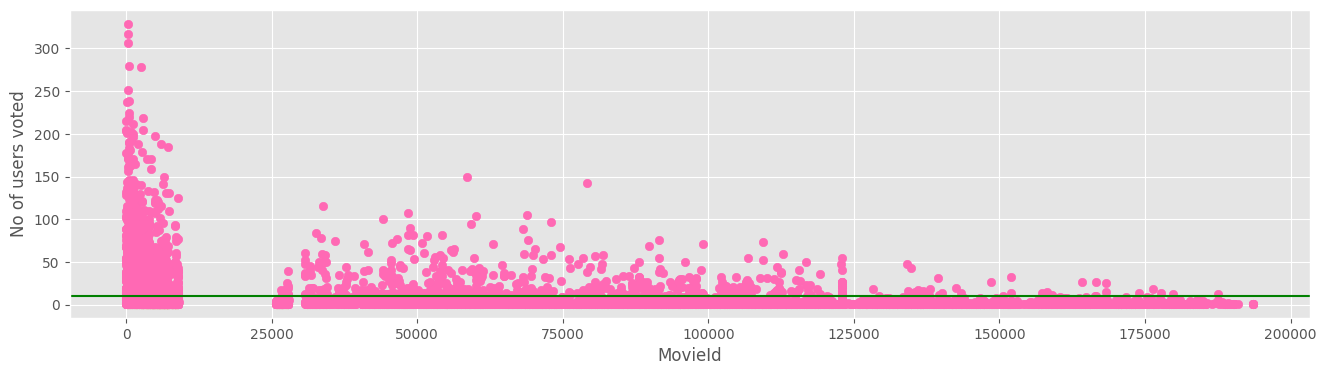

In [12]:
#Filme mit weniger als 10 ratings von usern fallen weg
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color="hotpink")
plt.axhline(y=10, color='green')
plt.xlabel("MovieId")
plt.ylabel("No of users voted")
plt.show()

In [13]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

In [14]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


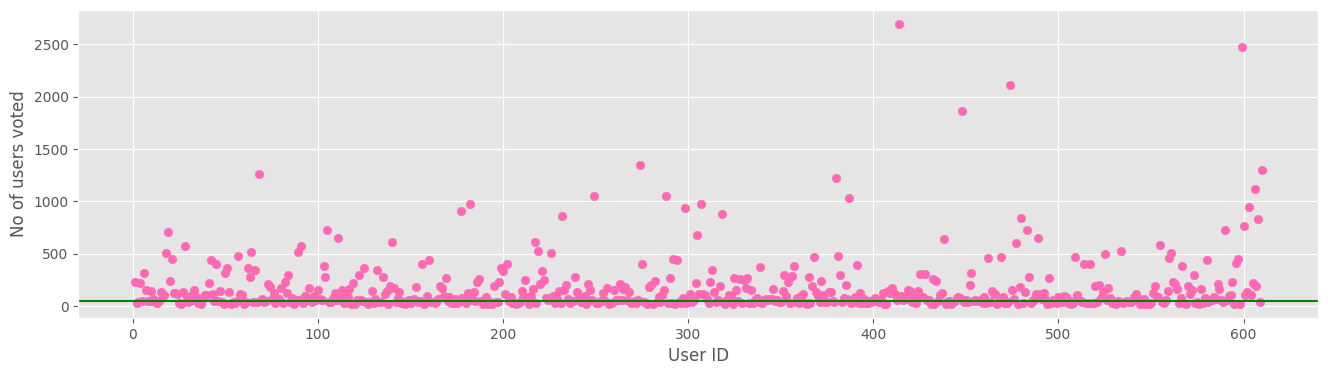

In [15]:
#user die weinger als 50 ratings abgegeben haben fallen weg
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color="hotpink")
plt.axhline(y=50, color='green')
plt.xlabel("User ID")
plt.ylabel("No of users voted")
plt.show()

In [16]:
final_dataset = final_dataset.loc[: , no_movies_voted[no_movies_voted>50].index]

In [17]:
final_dataset.shape

(2121, 378)

In [18]:
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [19]:
2121*378

801738

In [20]:
sample = np.array([[1,0,0,0,0], [0,0,2,0,0], [0,0,4,0,0]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.8


In [21]:
from scipy.sparse import csr_matrix


In [22]:

csr_sample = csr_matrix(sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 5)>
  Coords	Values
  (0, 0)	1
  (1, 2)	2
  (2, 2)	4


In [23]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [24]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72893 stored elements and shape (2121, 378)>
  Coords	Values
  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [60]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [26]:
import re

def normalize_string(s):
    return re.sub(r"[^a-zA-Z0-9]", "", s)  # Entfernt alle Nicht-Alphanumerischen Zeichen


In [27]:
def get_recommendation_genre(movie_name, genre = "", non_genre="  "):
    normalized_movie_name = normalize_string(movie_name)
    movie_list_genre = movies[movies['genres'].str.contains(genre, case=False)]
    movie_list_genre = movie_list_genre[movie_list_genre['genres'].str.contains(non_genre, case=False) == False]
    movie_list = movie_list_genre[movie_list_genre['title'].str.replace(r"[^a-zA-Z0-9]", "", regex=True).str.contains(normalized_movie_name, case=False)]
    print(movie_list)
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0: -1]
        print(rec_movies_indices, "lol")
        recommended_movies = []
        for val in rec_movies_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1], 'Genres': movies.iloc[idx]['genres'].values[0]})  
        print(recommended_movies,"\n")
        df = pd.DataFrame(recommended_movies, index=range(1, 11))
        return df
    else:
        return "Movie not found..."

In [58]:
def get_recommendation(movie_name):
    normalized_movie_name = normalize_string(movie_name)
    movie_list = movies[movies['title'].str.replace(r"[^a-zA-Z0-9]", "", regex=True).str.contains(normalized_movie_name, case=False)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0: -1]
        recommended_movies = []
        for val in rec_movies_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title'.lower(): movies.iloc[idx]['title'.lower()].values[0], 'Distance': val[1]})
        print(recommended_movies)
        df = pd.DataFrame(recommended_movies, index=range(1, len(recommended_movies)+1))
        return df
    else:
        return "Movie not found..."

In [59]:
get_recommendation("spider-man")

[{'title': 'Bourne Identity, The (2002)', 'Distance': 0.3437793417790962}, {'title': 'Matrix Reloaded, The (2003)', 'Distance': 0.3393598632070155}, {'title': 'Lord of the Rings: The Two Towers, The (2002)', 'Distance': 0.33647364285106784}, {'title': 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Distance': 0.3306268107234198}, {'title': 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Distance': 0.3239387287227049}, {'title': 'X-Men (2000)', 'Distance': 0.31497699733125417}, {'title': 'X2: X-Men United (2003)', 'Distance': 0.310659053956599}, {'title': 'Minority Report (2002)', 'Distance': 0.29982900488339337}, {'title': 'Star Wars: Episode II - Attack of the Clones (2002)', 'Distance': 0.26482630140409524}, {'title': 'Spider-Man 2 (2004)', 'Distance': 0.2572935019656153}]


,title,Distance
1,"Bourne Identity, The (2002)",0.343779
2,"Matrix Reloaded, The (2003)",0.339360
3,"Lord of the Rings: The Two Towers, The (2002)",0.336474
4,Pirates of the Caribbean: The Curse of the Bla...,0.330627
5,"Lord of the Rings: The Fellowship of the Ring,...",0.323939
6,X-Men (2000),0.314977
7,X2: X-Men United (2003),0.310659
8,Minority Report (2002),0.299829
9,Star Wars: Episode II - Attack of the Clones (...,0.264826
10,Spider-Man 2 (2004),0.257294


In [30]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [41]:
get_recommendation_genre("spider-man", '', "Sci-Fi")

      movieId                              title                    genres
8699   122926  Untitled Spider-Man Reboot (2017)  Action|Adventure|Fantasy
[(2079, 0.36810854206481447), (2085, 0.36779842445878985), (2115, 0.35332493941848375), (2105, 0.32986513640038784), (2087, 0.32273908060395473), (2082, 0.2571287544799), (2081, 0.24562498717598935), (2084, 0.23019615607670219), (2119, 0.22316535920229952), (2083, 0.14293896377100868)] lol
[{'Title': 'Ant-Man (2015)', 'Distance': 0.36810854206481447, 'Genres': 'Action|Adventure|Sci-Fi'}, {'Title': 'Captain America: Civil War (2016)', 'Distance': 0.36779842445878985, 'Genres': 'Action|Sci-Fi|Thriller'}, {'Title': 'Logan (2017)', 'Distance': 0.35332493941848375, 'Genres': 'Action|Sci-Fi'}, {'Title': 'Wonder Woman (2017)', 'Distance': 0.32986513640038784, 'Genres': 'Action|Adventure|Fantasy'}, {'Title': 'X-Men: Apocalypse (2016)', 'Distance': 0.32273908060395473, 'Genres': 'Action|Adventure|Fantasy|Sci-Fi'}, {'Title': 'Avengers: Infinity War

,Title,Distance,Genres
1,Ant-Man (2015),0.368109,Action|Adventure|Sci-Fi
2,Captain America: Civil War (2016),0.367798,Action|Sci-Fi|Thriller
3,Logan (2017),0.353325,Action|Sci-Fi
4,Wonder Woman (2017),0.329865,Action|Adventure|Fantasy
5,X-Men: Apocalypse (2016),0.322739,Action|Adventure|Fantasy|Sci-Fi
6,Avengers: Infinity War - Part I (2018),0.257129,Action|Adventure|Sci-Fi
7,Black Panther (2017),0.245625,Action|Adventure|Sci-Fi
8,Guardians of the Galaxy 2 (2017),0.230196,Action|Adventure|Sci-Fi
9,Star Wars: The Last Jedi (2017),0.223165,Action|Adventure|Fantasy|Sci-Fi
10,Thor: Ragnarok (2017),0.142939,Action|Adventure|Sci-Fi


In [39]:
get_recommendation_genre("spider-man")

      movieId                              title  \
3819     5349                  Spider-Man (2002)   
5260     8636                Spider-Man 2 (2004)   
6470    52722                Spider-Man 3 (2007)   
7927    95510     Amazing Spider-Man, The (2012)   
8406   110553    The Amazing Spider-Man 2 (2014)   
8699   122926  Untitled Spider-Man Reboot (2017)   

                                     genres  
3819       Action|Adventure|Sci-Fi|Thriller  
5260           Action|Adventure|Sci-Fi|IMAX  
6470  Action|Adventure|Sci-Fi|Thriller|IMAX  
7927           Action|Adventure|Sci-Fi|IMAX  
8406                     Action|Sci-Fi|IMAX  
8699               Action|Adventure|Fantasy  
[(1402, 0.3437793417790962), (1471, 0.3393598632070155), (1443, 0.33647364285106784), (1484, 0.3306268107234198), (1362, 0.3239387287227049), (1201, 0.31497699733125417), (1469, 0.310659053956599), (1405, 0.29982900488339337), (1399, 0.26482630140409524), (1583, 0.2572935019656153)] lol
[{'Title': 'Bourne Identi

,Title,Distance,Genres
1,"Bourne Identity, The (2002)",0.343779,Action|Mystery|Thriller
2,"Matrix Reloaded, The (2003)",0.339360,Action|Adventure|Sci-Fi|Thriller|IMAX
3,"Lord of the Rings: The Two Towers, The (2002)",0.336474,Adventure|Fantasy
4,Pirates of the Caribbean: The Curse of the Bla...,0.330627,Action|Adventure|Comedy|Fantasy
5,"Lord of the Rings: The Fellowship of the Ring,...",0.323939,Adventure|Fantasy
6,X-Men (2000),0.314977,Action|Adventure|Sci-Fi
7,X2: X-Men United (2003),0.310659,Action|Adventure|Sci-Fi|Thriller
8,Minority Report (2002),0.299829,Action|Crime|Mystery|Sci-Fi|Thriller
9,Star Wars: Episode II - Attack of the Clones (...,0.264826,Action|Adventure|Sci-Fi|IMAX
10,Spider-Man 2 (2004),0.257294,Action|Adventure|Sci-Fi|IMAX


In [33]:
get_recommendation_genre("spider-man", "", "Action")

Empty DataFrame
Columns: [movieId, title, genres]
Index: []


'Movie not found...'

In [34]:
import gradio as gr

def recommend_movies(movie_name):
    df = get_recommendation(movie_name)
    if isinstance(df, pd.DataFrame):
        return df.to_string(index=False)
    else:
        return df
app = gr.Interface(
    fn = recommend_movies, 
    inputs = "text",
    outputs = "text", 
    title = "Movie Recommendation System",
    description = "Enter a movie name to get a list of recommended movies"
)

app.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
